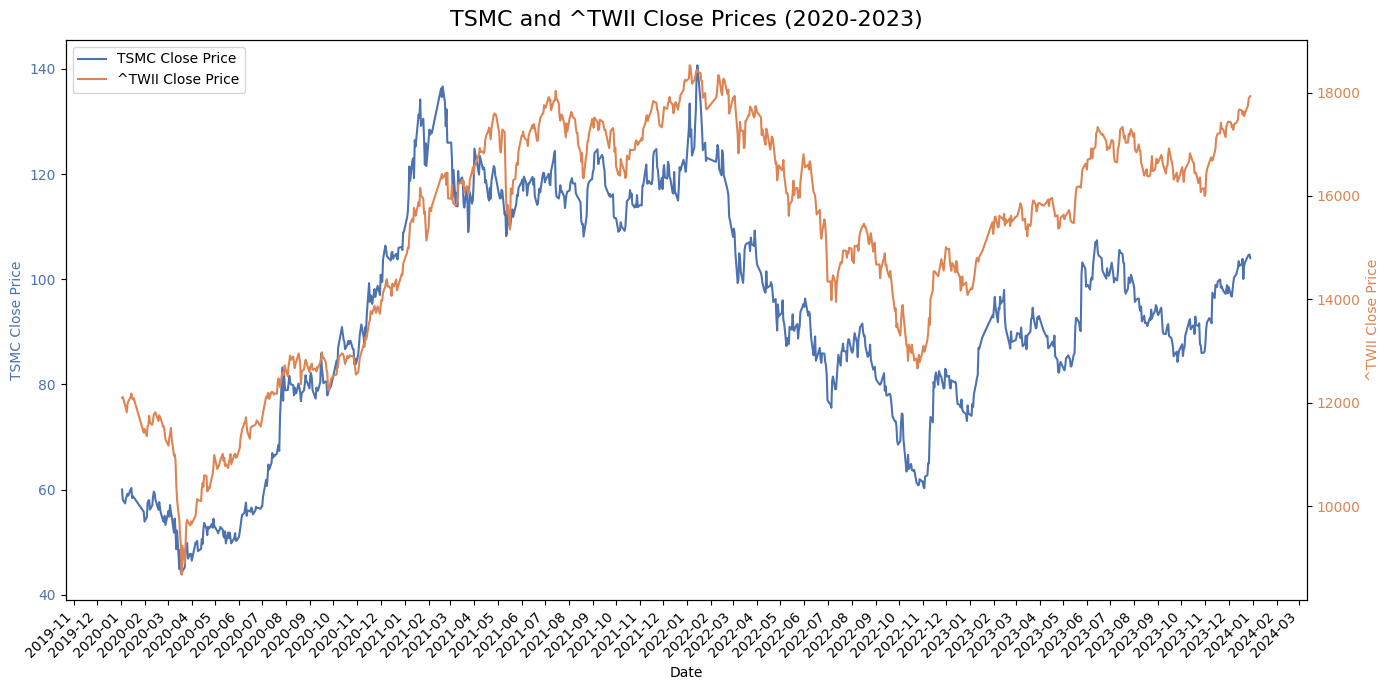

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 讀取數據
tsmc_df = pd.read_csv('/Users/jennifershih/Downloads/202001-202312_TSM.csv', parse_dates=['Date'])
taiwan_df = pd.read_csv('/Users/jennifershih/Downloads/202001-202312_TWII.csv', parse_dates=['Date'])

# 合併數據，根據日期進行合併
merged_df = pd.merge(tsmc_df[['Date', 'Close']], taiwan_df[['Date', 'Close']], on='Date', suffixes=('_TSMC', '_Taiwan'))

# 創建圖形和坐標軸
fig, ax1 = plt.subplots(figsize=(14, 7))

# 定義 Seaborn 調色盤
palette = sns.color_palette("deep", n_colors=2)

# 繪製台積電股價
sns.lineplot(data=merged_df, x='Date', y='Close_TSMC', ax=ax1, color=palette[0], label='TSMC Close Price')

# 創建第二個 Y 軸
ax2 = ax1.twinx()
sns.lineplot(data=merged_df, x='Date', y='Close_Taiwan', ax=ax2, color=palette[1], label='^TWII Close Price')

# 設置標籤和顏色
ax1.set_xlabel('Date')
ax1.set_ylabel('TSMC Close Price', color=palette[0])
ax1.tick_params(axis='y', labelcolor=palette[0])

ax2.set_ylabel('^TWII Close Price', color=palette[1])
ax2.tick_params(axis='y', labelcolor=palette[1])

# 設置 X 軸刻度格式
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())

# 旋轉 X 軸刻度標籤
for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

# 添加標題
plt.title('TSMC and ^TWII Close Prices (2020-2023)', fontsize=16, pad=10)

# 清除舊圖例（防止重複）
ax1.get_legend().remove()
ax2.get_legend().remove()

# 添加圖例並設定位置
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# 合併兩個圖例
ax1.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(0.15, 1))

# 避免標籤重疊
fig.tight_layout()

# 顯示圖表
plt.show()
